### Fruit Classification

Importing libraries

In [1]:
import os
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score




**sklearn (Scikit-learn)**

- **LabelEncoder**: This module is used to encode categorical labels into numeric values, making them suitable for machine learning algorithms that require numerical input.

- **train_test_split**: This function splits the dataset into training and testing sets, which is a must-have in any machine learning project to train the model on one portion of the data and test its performance on another, unseen portion.

- **StandardScaler**: This is a scaling that standardizes the feature values by removing the mean and scaling to unit variance. Standardization is crucial when features are measured on different units or scales for the model to treat each feature equally.

- **cross_val_score**: This is a function that will perform cross-validation to evaluate the model's performance on splitting the dataset into several subsets, called folds, and training the model on some of the folds and testing on the remaining ones to ensure it generalizes well on new, unseen data.

- **GridSearchCV**: It performs an exhaustive search over a specified parameter grid, using cross-validation to find the optimal hyperparameters for the model. This helps in improving the performance of the model through its hyperparameter tuning.
GaussianNB: This classifier implements the Naive Bayes algorithm assuming that features follow the Gaussian distribution. It will be useful for classification under a simple data set which assumes feature independence.

- **KNeighborsClassifier**: This classifier implements the K-Nearest Neighbors algorithm for classification tasks by voting with the majority label of the nearest neighbors in the feature space to new, unseen data points.

- **classification_report, confusion_matrix, accuracy_score**: These are used to evaluate the performance of classification models. The classification report gives precision, recall, F1-score, and support for each class, the confusion matrix gives the count of true positives, true negatives, false positives, and false negatives, and accuracy score gives the overall accuracy of the model.

### (a) Brief Exploration of Dataset

In [2]:
train_dir = 'data\\train'  
test_dir = 'data\\test'    
sample_submission = 'data\\sampleSubmission.csv'  


train_classes = os.listdir(train_dir)
num_classes = len(train_classes)
num_train_images = sum([len(os.listdir(os.path.join(train_dir, fruit))) for fruit in train_classes])

print(f"Number of Classes: {num_classes}")
print(f"Number of Training Images: {num_train_images}")


Number of Classes: 33
Number of Training Images: 16854


In [3]:
class_counts = [len(os.listdir(os.path.join(train_dir, fruit))) for fruit in train_classes]
class_names = train_classes

print(f"Classes: {class_names}")
print(f"Number of Images per Class: {class_counts}")


Classes: ['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']
Number of Images per Class: [492, 492, 492, 427, 490, 462, 490, 492, 492, 490, 450, 392, 984, 466, 492, 490, 490, 438, 479, 492, 490, 492, 696, 444, 666, 490, 447, 492, 450, 490, 492, 738, 475]


In [4]:
# Checking dimensions of the images to ensure they are consistent
sample_fruit = 'Apple Braeburn' 
sample_images = os.listdir(os.path.join(train_dir, sample_fruit))[:5] 

for img_name in sample_images:
    img_path = os.path.join(train_dir, sample_fruit, img_name)
    img = Image.open(img_path)
    print(f"Image {img_name} size: {img.size}")


Image Apple Braeburn_0.jpg size: (100, 100)
Image Apple Braeburn_1.jpg size: (100, 100)
Image Apple Braeburn_10.jpg size: (100, 100)
Image Apple Braeburn_100.jpg size: (100, 100)
Image Apple Braeburn_101.jpg size: (100, 100)


In [5]:
# Checking for any missing or corrupt images
try:
    for fruit in train_classes:
        for img_name in os.listdir(os.path.join(train_dir, fruit)):
            img_path = os.path.join(train_dir, fruit, img_name)
            img = Image.open(img_path)
            img.verify() 
except Exception as e:
    print(f"Error with image {img_path}: {e}")


In [6]:
sample_submission_df = pd.read_csv(sample_submission)
print(sample_submission_df.head())
print(f"Unique labels: {sample_submission_df['label'].nunique()}")


   id           label
0   0  Apple Braeburn
1   1  Apple Braeburn
2   2  Apple Braeburn
3   3  Apple Braeburn
4   4  Apple Braeburn
Unique labels: 1


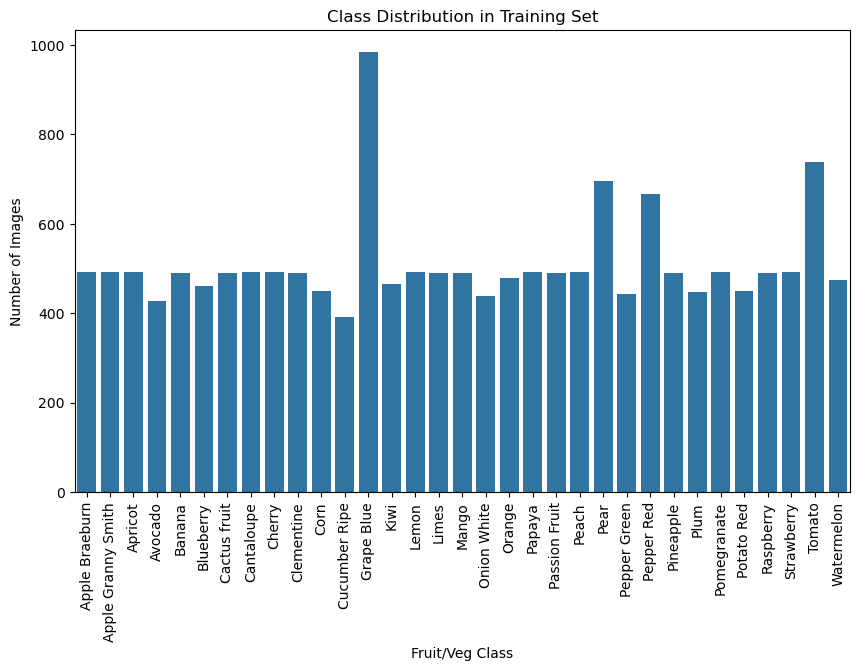

In [7]:
# Ploting class distribution (number of images per class)
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=class_counts)
plt.xticks(rotation=90)
plt.xlabel('Fruit/Veg Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in Training Set')
plt.show()


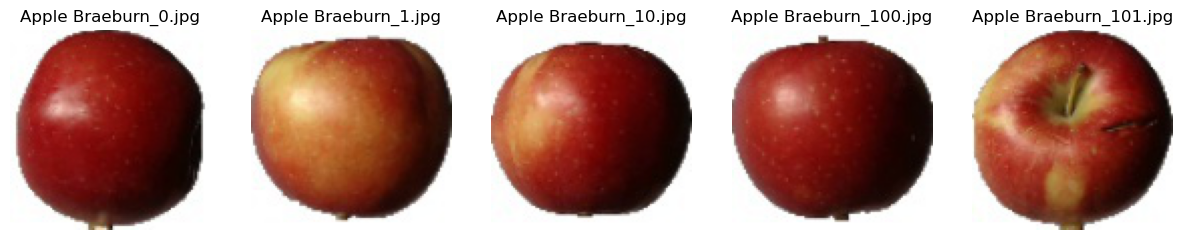

In [8]:
# Display sample images from a selected class
fig, axes = plt.subplots(1, 5, figsize=(15, 15))

for i, img_name in enumerate(sample_images):
    img_path = os.path.join(train_dir, sample_fruit, img_name)
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(img_name)

plt.show()


Markdown cell for (a)
- Number of Classes: 33
- Total Number of Training Images: 16854


- Type of Classes: ['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']

- Number of Images per Class: [492, 492, 492, 427, 490, 462, 490, 492, 492, 490, 450, 392, 984, 466, 492, 490, 490, 438, 479, 492, 490, 492, 696, 444, 666, 490, 447, 492, 450, 490, 492, 738, 475]

- All Image dimensions: 100x100
- checked any corrupt image is presented or not
- verified a sample submission file.

- plotted a distribution of images across the all classes in training dataset.

- displaying sample images.

### (b) & (c) Pre-processing & Feature Engineering

In [9]:

# Resizing training images to 32x32 pixels to reduce feature size
def preprocess_images(image_dir, size=(32, 32)):
    images = []
    labels = []
    
    for fruit_class in os.listdir(image_dir):
        fruit_class_path = os.path.join(image_dir, fruit_class)
        for img_name in os.listdir(fruit_class_path):
            img_path = os.path.join(fruit_class_path, img_name)
            img = Image.open(img_path).convert('RGB')
            img = img.resize(size)  
            img = np.array(img) / 255.0 
            images.append(img.flatten()) 
            labels.append(fruit_class)
    return np.array(images), np.array(labels)


In [10]:

train_dir = 'data\\train'

X_train, y_train = preprocess_images(train_dir, size=(32, 32))

# Standardize the data for KNN and Gaussian Naive Bayes
scaler = StandardScaler()

# Fit and transform on training data
X_train_scaled = scaler.fit_transform(X_train)

print(f"Scaled training data shape: {X_train_scaled.shape}")



Scaled training data shape: (16854, 3072)


In [11]:
# label encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [12]:
# Resizing testing images to 32x32 pixels to reduce feature size
test_images = []
test_ids = []

# preprocessing test images
for img_name in os.listdir(test_dir):
    img_path = os.path.join(test_dir, img_name)
    img = Image.open(img_path).convert('RGB')
    img = img.resize((32, 32))  
    img = np.array(img) / 255.0 
    test_images.append(img.flatten()) 
    test_ids.append(img_name.split('.')[0]) 


In [13]:
test_dir = 'data\\test'
X_test_scaled = np.array(test_images)
print(f"Test data shape: {X_test_scaled.shape}")


Test data shape: (5641, 3072)


In [14]:
# Split the training data train and validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

Markdown for (b) & (c)

- resizing the images to 32x32 pixels for fast and better processing(training images).
- Scaled training data shape: (16854, 3072)
- loading images for training

- Label Encoding the classes.

- resizing the images to 32x32 pixels for fast and better processing(testing images).
- loading images for testing.
- scaled Test data shape: (5641, 3072)


### (d) Processing of each dataset using two different machine learning methods

### Gaussian Naive Bayes

In [15]:

# Gaussian Naive Bayes model
gnb = GaussianNB()

# Perform 5-fold cross-validation
gnb_accuracy = cross_val_score(gnb, X_train_scaled, y_train, cv=5, scoring='accuracy')

print("Gaussian Naive Bayes Results:")
print(f"Cross-validation Accuracy Scores: {gnb_accuracy}")
print(f"Mean CV Accuracy: {gnb_accuracy.mean():.4f}\n")

gnb.fit(X_train_split, y_train_split)

y_val_pred = gnb.predict(X_val_split)

print("Classification Report on Validation Data:")
print(classification_report(y_val_split, y_val_pred))



Gaussian Naive Bayes Results:
Cross-validation Accuracy Scores: [0.94007713 0.94156037 0.93562741 0.94185702 0.94718101]
Mean CV Accuracy: 0.9413

Classification Report on Validation Data:
                    precision    recall  f1-score   support

    Apple Braeburn       0.84      1.00      0.91       113
Apple Granny Smith       1.00      0.94      0.97        80
           Apricot       0.99      0.99      0.99        93
           Avocado       1.00      0.94      0.97        88
            Banana       0.97      0.59      0.73        99
         Blueberry       0.99      0.98      0.98        81
      Cactus fruit       0.93      0.80      0.86       103
        Cantaloupe       1.00      1.00      1.00        94
            Cherry       1.00      0.98      0.99       110
        Clementine       1.00      1.00      1.00        97
              Corn       0.55      0.98      0.71        85
     Cucumber Ripe       0.86      0.89      0.87        74
        Grape Blue       1.00 

### KNN 

In [16]:
# KNN model
knn = KNeighborsClassifier()

# hyperparameter grid for tuning (n_neighbors from 3 to 15)
param_grid = {'n_neighbors': range(3, 16)}

# Using GridSearchCV to find the best parameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_split, y_train_split)

best_k = grid_search.best_params_['n_neighbors']
print(f"Best K value found: {best_k}")

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_split, y_train_split)

y_val_pred = best_knn.predict(X_val_split)

knn_accuracy = accuracy_score(y_val_split, y_val_pred)
print("\nK-Nearest Neighbors Results on Validation Set:")
print(f"Validation Accuracy: {knn_accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_val_split, y_val_pred))



Best K value found: 3

K-Nearest Neighbors Results on Validation Set:
Validation Accuracy: 0.9997

Classification Report:
                    precision    recall  f1-score   support

    Apple Braeburn       1.00      1.00      1.00       113
Apple Granny Smith       1.00      1.00      1.00        80
           Apricot       1.00      1.00      1.00        93
           Avocado       1.00      1.00      1.00        88
            Banana       1.00      0.99      0.99        99
         Blueberry       1.00      1.00      1.00        81
      Cactus fruit       1.00      1.00      1.00       103
        Cantaloupe       1.00      1.00      1.00        94
            Cherry       1.00      1.00      1.00       110
        Clementine       1.00      1.00      1.00        97
              Corn       1.00      1.00      1.00        85
     Cucumber Ripe       1.00      1.00      1.00        74
        Grape Blue       1.00      1.00      1.00       200
              Kiwi       1.00      1.

### Markdown for model Evaluation:

The results highlight the performance of Gaussian Naive Bayes and K-Nearest Neighbors classifiers on a multi-class classification problem. GNB had an average cross-validation accuracy of **94.13%** and an overall validation accuracy of **94%**, with good precisions and recalls for most classes, though it struggled slightly with specific classes like "Banana" and "Pear". KNN, after hyperparameter tuning to find the optimal parameter n_neighbors=3, delivered an exceptional overall validation accuracy of **99.97%**, boasting almost perfect precision, recall, and F1-scores across all classes.

### (e) Comparative analysis of the two methods on dataset:


GNB training time: 0.8506 seconds
GNB testing time: 3.9233 seconds

KNN training time: 0.0653 seconds
KNN testing time: 4.4593 seconds


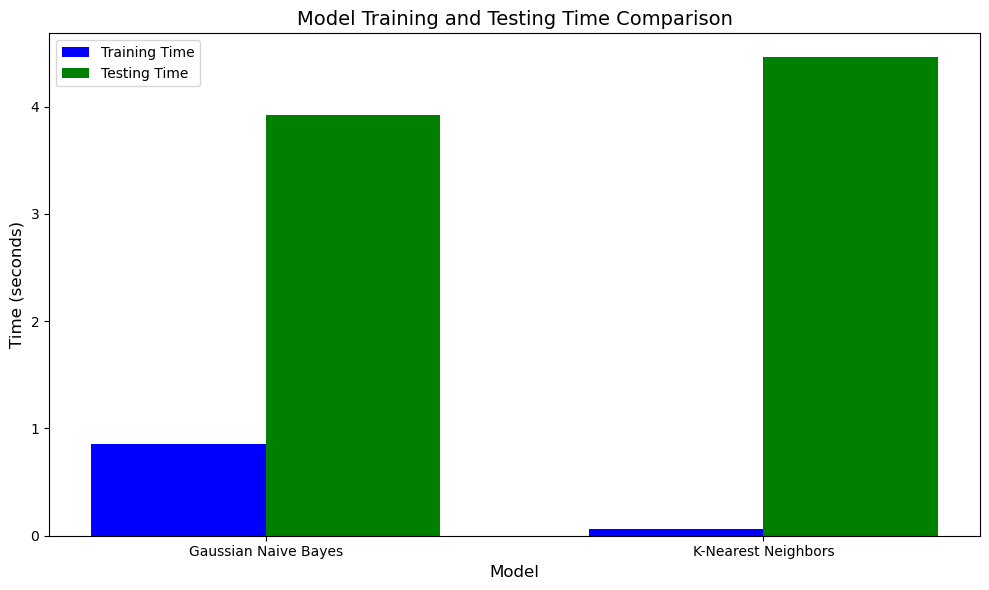

In [17]:
# Time taken for Gaussian Naive Bayes training and Testing
start_time_gnb_train = time.time()
gnb.fit(X_train_split, y_train_split)
end_time_gnb_train = time.time()
gnb_train_time = end_time_gnb_train - start_time_gnb_train

start_time_gnb_test = time.time()
y_val_pred_gnb = gnb.predict(X_val_split)
end_time_gnb_test = time.time()
gnb_test_time = end_time_gnb_test - start_time_gnb_test

print(f"\nGNB training time: {gnb_train_time:.4f} seconds")
print(f"GNB testing time: {gnb_test_time:.4f} seconds")


# Time taken for KNN training and Testing
start_time_knn_train = time.time()
best_knn.fit(X_train_split, y_train_split)
end_time_knn_train = time.time()
knn_train_time = end_time_knn_train - start_time_knn_train

start_time_knn_test = time.time()
y_val_pred_knn = best_knn.predict(X_val_split)
end_time_knn_test = time.time()
knn_test_time = end_time_knn_test - start_time_knn_test


print(f"\nKNN training time: {knn_train_time:.4f} seconds")
print(f"KNN testing time: {knn_test_time:.4f} seconds")

# plotting graph
models = ['Gaussian Naive Bayes', 'K-Nearest Neighbors']
train_times = [gnb_train_time, knn_train_time]
test_times = [gnb_test_time, knn_test_time]
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(models))
plt.bar(index, train_times, bar_width, label='Training Time', color='b')
plt.bar([i + bar_width for i in index], test_times, bar_width, label='Testing Time', color='g')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Time (seconds)', fontsize=12)
plt.title('Model Training and Testing Time Comparison', fontsize=14)
plt.xticks([i + bar_width / 2 for i in index], models)
plt.legend()
plt.tight_layout()
plt.show()


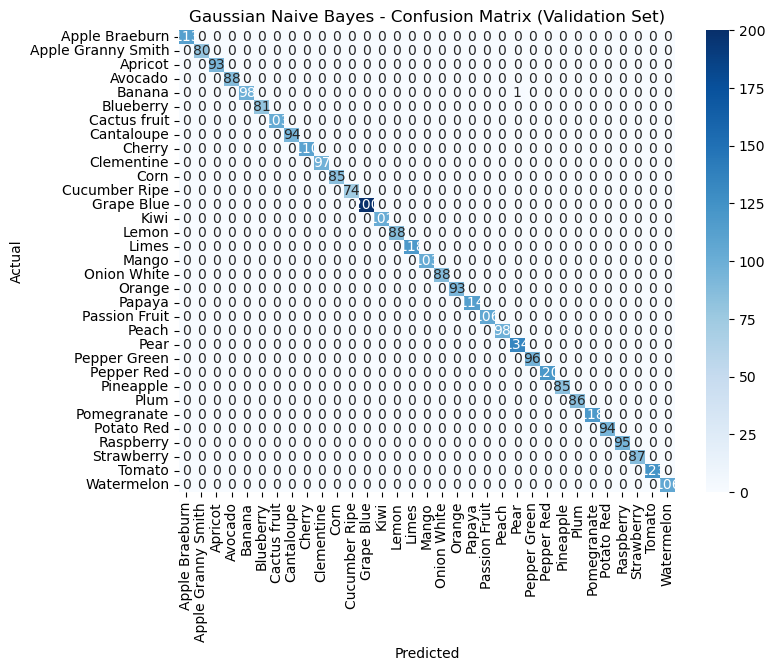

In [18]:

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_val_split, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Gaussian Naive Bayes - Confusion Matrix (Validation Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



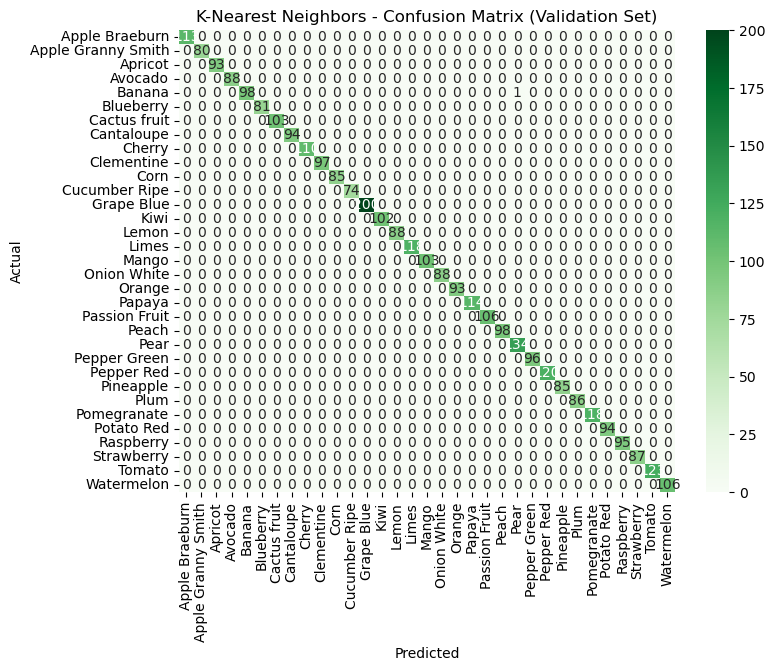

In [19]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_val_split, y_val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("K-Nearest Neighbors - Confusion Matrix (Validation Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


C:\Users\Dipen\AppData\Local\Temp\ipykernel_18480\1298089273.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_scores, palette='viridis')


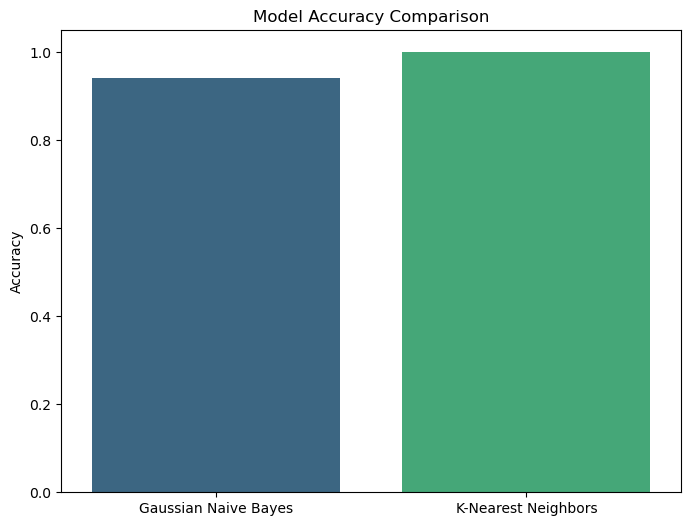

In [20]:
# plotting comparison
models = ['Gaussian Naive Bayes', 'K-Nearest Neighbors']
accuracy_scores = [gnb_accuracy.mean(), knn_accuracy]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracy_scores, palette='viridis')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


In [21]:
print("Model Comparison:")
print(f"Gaussian Naive Bayes Test Accuracy: {gnb_accuracy.mean():.4f}")
print(f"K-Nearest Neighbors Test Accuracy: {knn_accuracy:.4f}")


Model Comparison:
Gaussian Naive Bayes Test Accuracy: 0.9413
K-Nearest Neighbors Test Accuracy: 0.9997


### Model Comparison and Performance Analysis markdown:


The results indicate a clear betterness of **K-Nearest Neighbors (KNN)** compared to **Gaussian Naive Bayes (GNB)**, with an accuracy of 99.97% for KNN vs 94.13% for GNB. This is further highlighted through the confusion matrices, where KNN has fewer misclassifications across all classes and GNB has noticeable errors for certain categories. 

However, KNN has higher computational complexity, especially with larger datasets, since it relies on distance calculations for each query instance, while GNB is computationally faster due to its probabilistic approach. GNB could be a good alternative for small datasets where speed is crucial, but since there is a great improvement in performance, **KNN** is recommended for production.

In terms of **training time**, the K-Nearest Neighbor  model is significantly faster compared to the Gaussian Naive Bayes (GNB) model. In **testing time**, K-Nearest Neighbors model requires substantially more time while Gaussian Naive Bayes. This indicates that while KNN has a quicker training phase but it may take longer during the testing phase due to its reliance on distance calculations across all training instances for each test point.

### (f) Ethical Issues in Fruit Multi-Class Classification 


**Dataset Diversity :** 
The dataset utilized in fruit multi-class classification may lack diversity regarding fruit appearance, conditions of lighting, backgrounds, and geographic origins. If a model becomes biased by training it on images from limited conditions, then it may perform poorly during deployment in the real world when the lighting is different, or the angle or background is different. For instance, fruits can look quite different in geographically different regions of the world, with different light conditions and camera settings. All this can make a serious difference in the performance of a model in such varying environments. Therefore, collecting data should be diverse, capturing a wide variety in the type of fruits, region, lighting, and backgrounds. This will enhance the robustness and generalizability of the model, hence reducing the chances of poor performance in real-world applications.

**Accessibility of Technology :** 
While fruit recognition models are useful to farmers, grocers, and the food industry in general, not everyone can have access to such technology, especially in low-income or underserved communities. The technology gap can further widen the inequalities by making advanced tools, such as automated fruit sorting or classification, accessible only to well-funded sectors. These could greatly enhance efficiency and productivity in agriculture, but if they are not accessible to small-scale farmers or businesses in economically disadvantaged areas, it could result in unequal opportunities. The ethical challenge would come from bridging that gap to include such technologies among those widely available. This may call for facilitating open-source implementation for various fruits recognition models besides rendering tools that are within people's budget. Moreover, it requires funding by governments and NGOs of the development and distribution of such technologies in these under-resourced parts of the world to achieve fairness in terms of the advantages emanating from a rapidly advancing world.

**Algorithmic Bias :**
It becomes a very critical issue because this algorithmic bias could imply poor performance in some fruit types or underrepresented varieties, which can lead to misclassifications in a real automated system like fruit sorting machines. Such misclassifications of certain fruits over others, because of an underrepresentation in the training set, can result in economic loss for farmers, suppliers, or retailers using the technology to sort, pack, and sell their produce. The model might then favor fruits that are in the majority in the training set and miss the less common ones. This risk can be mitigated by periodic auditing of the model's predictions with respect to fairness and accuracy. Once such biases are detected, the model should be retrained on more diverse and balanced datasets to ensure that it performs well across all fruit types and not just the most common ones. This helps maintain fairness in automated decision-making systems and prevents economic harm to stakeholders in the fruit supply chain.

### (g) Bibliography

1. **Scikit-learn Documentation**  
   Scikit-learn provides me comprehensive resources on various machine learning models including Gaussian Naive Bayes and K nearest neighbors.  
   [Scikit-learn Documentation](https://scikit-learn.org/stable/)

2. **ChatGPT**  
   ChatGPT helped me identify errors while writing code and understand their meanings to solve problems. It also assisted in breaking down detailed tasks and ensuring smooth project flow.

3. **Stack Overflow**  
   Stack Overflow was invaluable in solving specific errors and troubleshooting issues while working on the dataset and performing tasks in the project.
